## Introduction

The dataset is of Bank Marketing that is publicly available for research from the University of California at Irvine (UCI) Machine Learning Repository.This data is based on direct marketing campaigns of a Portuguese banking institution. Marketing campaigns are based on phone calls and relate to 17 campaigns that took place from May 2008 to November 2010.Our data includes 45 211 observations of 17 properties, including 10 categorical properties and 7 numerical properties.

## Aim of the Study

The aim of the study is to find that whether the client has subscribed for deposit for not on the basis of avialable features

#### Table1. Description of the features of Banking Dataset

|Variables|Explaination of the Variables|
|---|---|
|Age|Age of the clients|
|Job|type of job admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")|
|Marital|marital status ("divorced","married","single","unknown"; note: "divorced" means divorced or widowed)|
|Education|("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")|
|Default|Does the customer have credit in default? ( "no","yes","unknown")|
|Housing|Does the customer have a housing loan? ("no","yes","unknown")|
|Loan|Does the customer have a personal loan? "no","yes","unknown")|
|Contact|contact communication type ("cellular","telephone") |
|Month|last contact month of year ("jan", "feb", "mar", ..., "nov", "dec")|
|day_of_week|last contact day of the week ("mon","tue","wed","thu","fri")|
|Duration| last contact duration, in seconds. Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no")|
|Campaign| Number of contacts performed during this campaign and for this client includes last contact|
|pdays|Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)|
|Previous|number of contacts performed before this campaign and for this client|
|poutcome|outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")|y 
|y | has the client subscribed to a term deposit? ("yes","no")|


In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the train set
train=pd.read_csv('train.csv',sep=';')

In [3]:
train.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
#reading the test set
test=pd.read_csv('test.csv',sep=';')

In [5]:
test.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [6]:
#merging the train and test datset using concat function
Banking=pd.concat([train,test])

In [7]:
# to find the number of obervation and the features
Banking.shape

(49732, 17)

From above function, we can find out that after merging the train and test dataset, we have total of 49732 obervation and 17 variables

In [8]:
#getting the information like number of missing value and data types of each variable
Banking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


#### Table 2. Statistical Metrics of each column

|Variables|Statistical Metrics|
|---|---|
|Age|Numerical|
|Job|Categorical|
|Marital|Categorical|
|Eductaion|Categorical|
|Deafult|Categorical|
|Housing|Categorical|
|Loan|Categorical|
|Contact|Categorical|
|Month|Categorical|
|day_of_week|Numerical|
|Duration|Numerical|
|Campaign|Numerical|
|Pdays|Numerical|
|Previous|Numerical|
|Poutcome|Categorical|
|y|Categorical|

In [9]:
#finding the number of unique values of each variable
Banking.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [10]:
#getting the unique values of the campaign variable
Banking.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [11]:
# getting the unique values of the previous variable
Banking.previous.unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [12]:
#getting the unique values of the Age column
Banking.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [13]:
#getting the unique value of day_of_week Column
Banking.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [14]:
#getting the unique value of duration Column
Banking.duration.unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

In [15]:
#getting the unique value of pdays Column
Banking.pdays.unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [16]:
# deleting the duplicate observations from the dataset if any
Banking.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


After dropping the duplicate observation, we are left with 45211 observation and 17 variables. 

In [17]:
# to the the 5 point summary of the numerical variables of the dataset
Banking.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


From above function we can observe that in Variable previous we have around 75% of the obsevation that are marked with 0 so we can consider it as missing value and similarly for pdays we can see that 50% of the observation are marked as -1 so we can consider it as missing value or erroneous value

In [18]:
#to get the skewness value of numerical column of the dataset
Banking.skew(axis=0)

age          0.686033
balance      8.204429
day          0.093154
duration     3.109530
campaign     4.884266
pdays        2.624838
previous    40.783648
dtype: float64

|Variable| Skew Value| Skewness|
|---|---|---|
|Age|0.686033|Moderately Right Skewed|
|balance|8.204429|Highly Right Skewed|
|Day|0.093154|Normally Distributed|
|Duration|3.10953|Highly Right Skewed|
|Campaign|4.884266|Highly Right Skewed|
|Pdays|2.624838|Highly Right Skewed|
|Previous|40.783648|Highly Right Skewed|

In [19]:
# replacing the value 0 with Nan of previous variable of the dataset
Banking.previous[Banking.previous==0]=np.nan
Banking.previous[np.isnan(Banking.previous)]

<ipython-input-19-eb322112c91c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Banking.previous[Banking.previous==0]=np.nan


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4513   NaN
4515   NaN
4516   NaN
4517   NaN
4518   NaN
Name: previous, Length: 40659, dtype: float64

In [20]:
#replacing the value of pdays from -1 to Nan
Banking.pdays[Banking.pdays==-1]=np.nan
Banking.pdays[np.isnan(Banking.pdays)]

<ipython-input-20-c0867ad9ab23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Banking.pdays[Banking.pdays==-1]=np.nan


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4513   NaN
4515   NaN
4516   NaN
4517   NaN
4518   NaN
Name: pdays, Length: 40659, dtype: float64

## Missing Value Information

In [21]:
#importing the libary missingno to get the infomartion about the missing value
import missingno as msno

<AxesSubplot:>

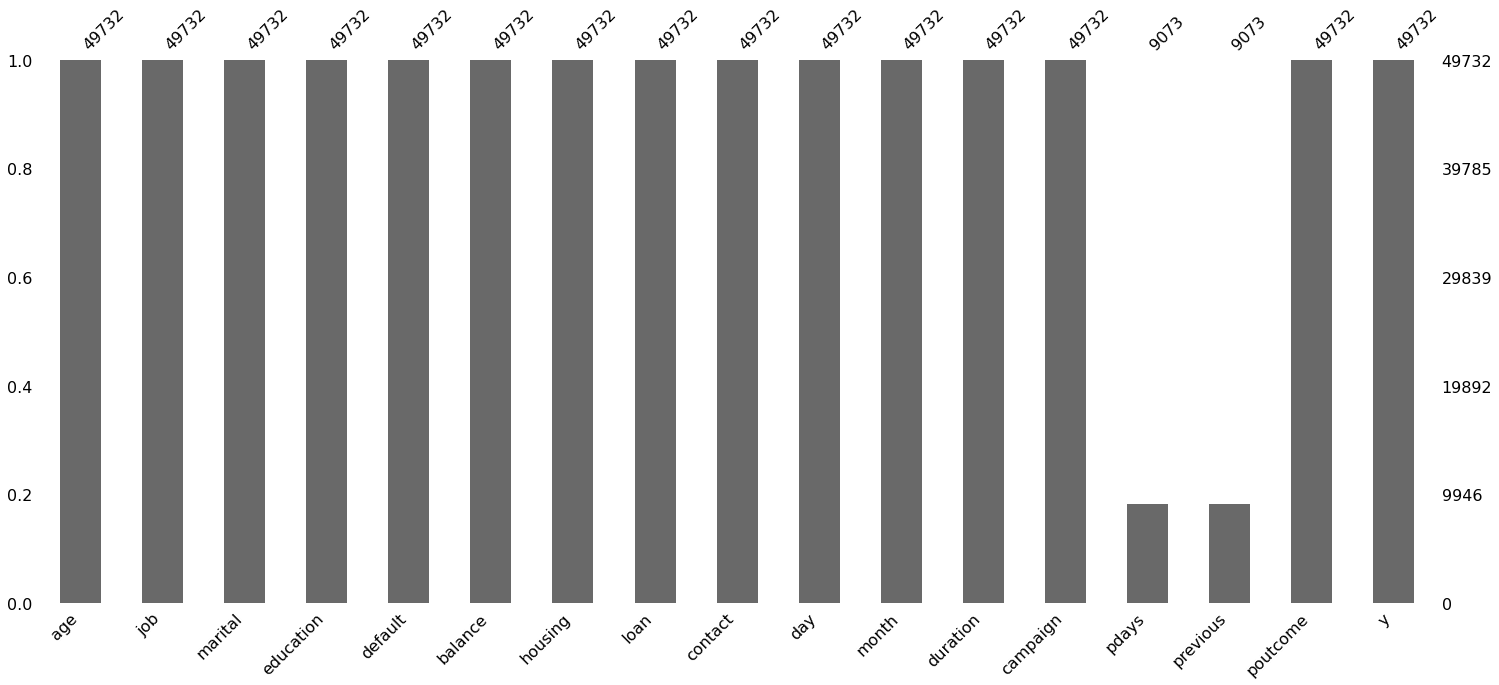

In [22]:
# creating a bar grpah of all the varible to get the number of missing obervation of each variable
msno.bar(Banking)

since pdays refers to the number of days that passed by after the client was last contacted from a previous campaign and the number of missing or erroneous values are too much therefore to drop this column is a good idea.

previous refers to the number of contacts performed before this campaign and for this client therefor imputation can be performed for the missing value as the number of missing value is high therefore mean median imputation will replace all the missing data with single value therefore, we should pgo with advance imputation technique that is KNN imputation

In [23]:
#calling the describe function without missing value
Banking.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,9073.000000,9073.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,224.603549,3.162129
std,10.615008,3041.608766,8.315680,257.743149,3.099075,115.505707,4.437948
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,133.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,194.000000,2.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,327.000000,4.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [24]:
# dropping the variable pdays from the dataset
Banking=Banking.drop(['pdays'],axis=1)

In [25]:
#calling the head function to check the dropping of variable has been done successfully
Banking.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,unknown,no


Dropping of pdays column is done successfully

#### Imputing the Missing Value

In [26]:
# imputing the mising value with the median as the data is skwed
Banking.fillna(Banking.median())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,2.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,2.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,2.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,2.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,2.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,2.0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,2.0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,2.0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,3.0,other,no


Replaced the missing value of the previous column with the median as the column is highly skewed therefore replacing it with median is a good approach

In [27]:
#calling describe function after imputation of missing value
Banking.describe()

,age,balance,day,duration,campaign,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,9073.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,3.162129
std,10.615008,3041.608766,8.315680,257.743149,3.099075,4.437948
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,2.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,4.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000


## Univariate Analysis


### Categorical Variables


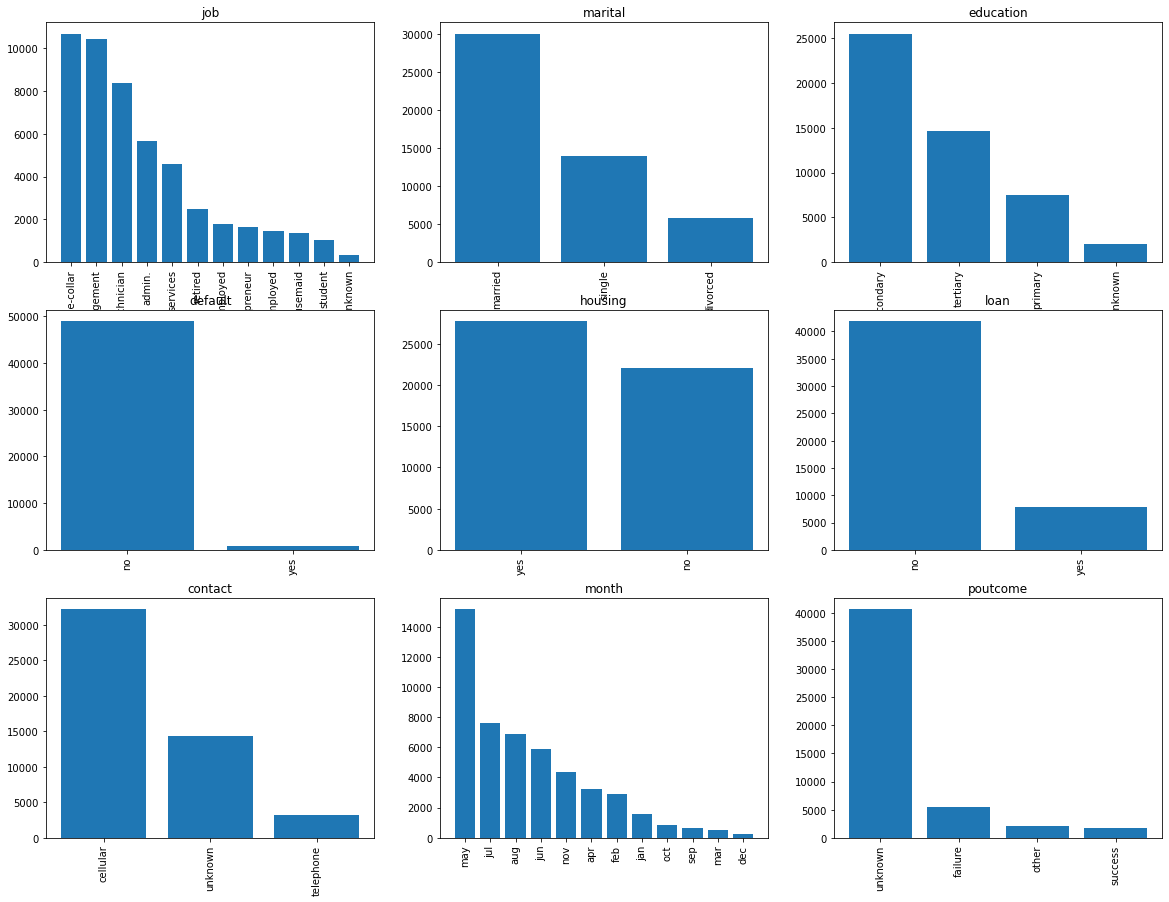

In [28]:
#creating a list of all categorical variables of the dataset
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))
# initiallizing a counter variable as the value of index 
counter = 0
for cat_column in cat_columns: # for loop to read each category of the list 
    value_counts = Banking[cat_column].value_counts() # counting the value of each categorical variable
    
    x = counter // 3
    y = counter % 3
    pos = np.arange(0, len(value_counts))
    
    axs[x, y].bar(pos, value_counts.values, tick_label = value_counts.index)
    
    axs[x, y].set_title(cat_column)
    
    for tick in axs[x, y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

Above graph clearly expalin the value count of each categorical variable

### Numerical Variables

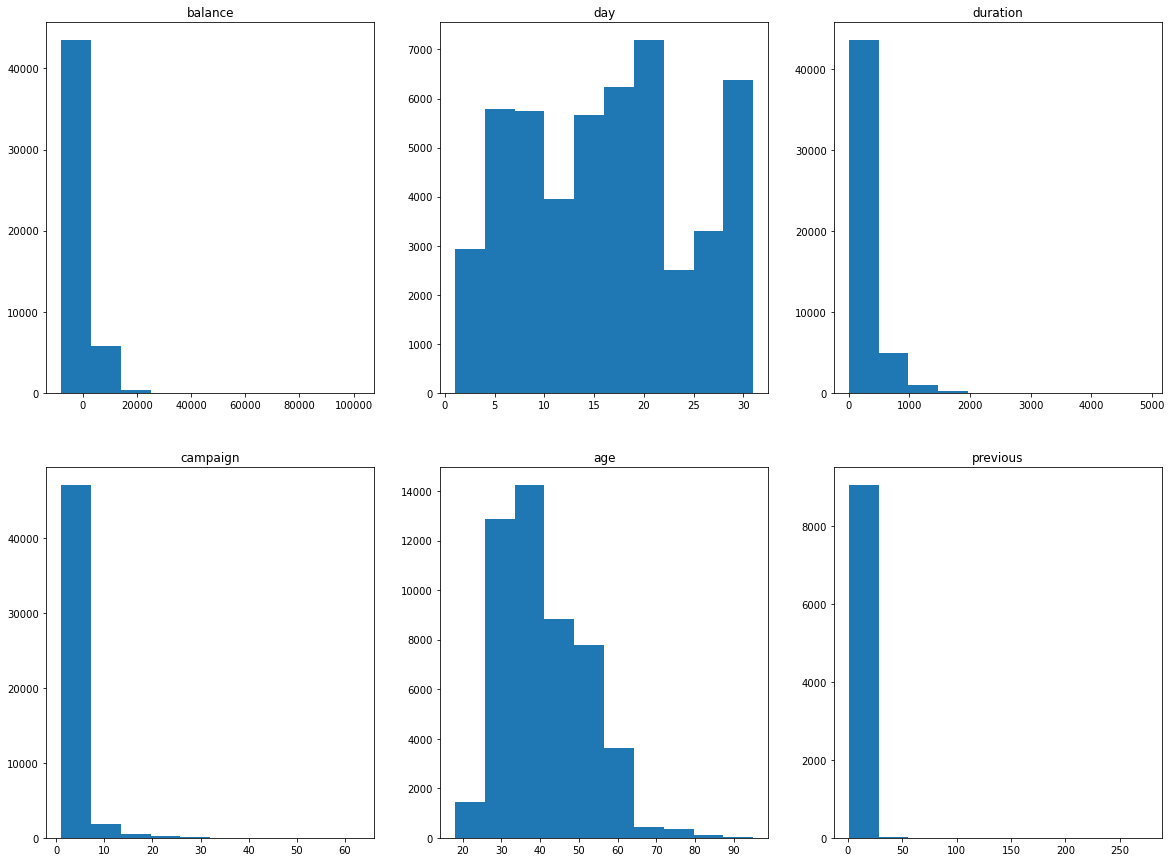

In [29]:
num_columns = ['balance', 'day','duration', 'campaign', 'age', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    x = counter // 3
    y = counter % 3
    
    axs[x, y].hist(Banking[num_column])
    
    axs[x, y].set_title(num_column)
    
    counter += 1

plt.show()

Variables like : Balance, duration,campaignand previous are highly right skewed, so we need to transform for further analysis

### Transformation

In [30]:
to_log=['balance','campaign','previous'] # creating list of variable columns that needs to be transformed 
Banking_log = Banking[to_log].applymap(lambda x: np.log(x+1))# applying log (x+1) tranformation elementwise

<ipython-input-30-bcbf190fcb30>:2: RuntimeWarning: invalid value encountered in log
  Banking_log = Banking[to_log].applymap(lambda x: np.log(x+1))# applying log (x+1) tranformation elementwise
<ipython-input-30-bcbf190fcb30>:2: RuntimeWarning: divide by zero encountered in log
  Banking_log = Banking[to_log].applymap(lambda x: np.log(x+1))# applying log (x+1) tranformation elementwise


<AxesSubplot:xlabel='previous', ylabel='Count'>

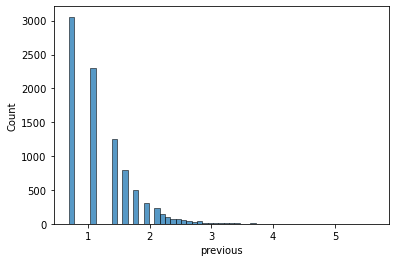

In [31]:
sns.histplot(Banking_log['previous'])

After transformation also data is not getting normally distributed

<AxesSubplot:xlabel='campaign', ylabel='Count'>

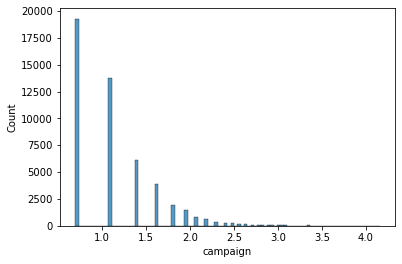

In [32]:
sns.histplot(Banking_log['campaign'])

Transfomation could not change the distribution of data

C:\Users\Neha Mehlawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

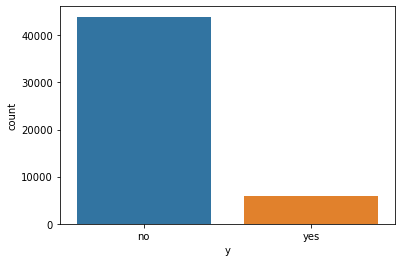

In [33]:
sns.countplot('y',data=Banking)

The above graph gives the count of deposit(y) column 

## Bivariate Analysis

#### Realtionship between Categorical-Categorical Variable

C:\Users\Neha Mehlawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

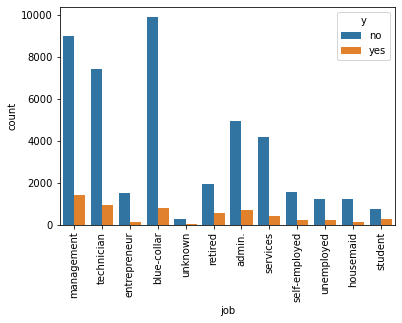

In [34]:
plot=sns.countplot('job',hue='y',data=Banking)
plt.setp(plot.get_xticklabels(), rotation=90)

From the above graph we can see that the number of non-deposit is higher in every category but when we take ratio tehn we can say that the category of student is better in terms of deposit ratio

C:\Users\Neha Mehlawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

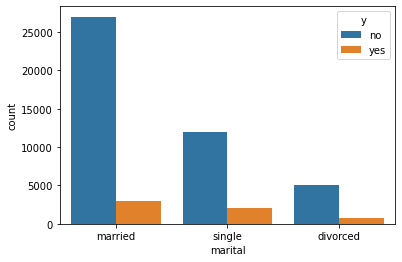

In [35]:
sns.countplot('marital',hue='y',data=Banking)

Ratio of deposit is better in the category of singles and its is very poor in case of married

C:\Users\Neha Mehlawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

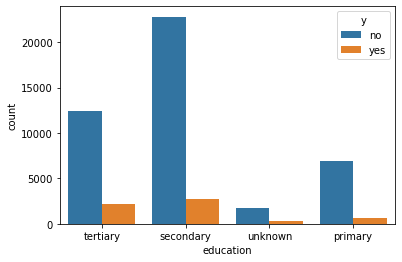

In [36]:
sns.countplot('education',hue='y',data=Banking)

Majority of the population falls under the category of secondary education byt the ratio of depositor is higher in the category with tertiary eductaion

C:\Users\Neha Mehlawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing', ylabel='count'>

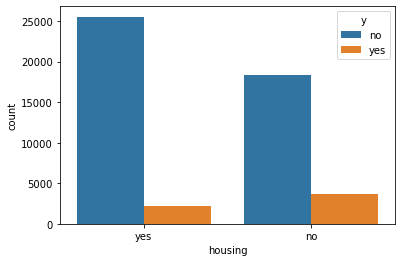

In [37]:
sns.countplot('housing',hue='y',data=Banking)

Population who does not have housing deposit more in comparison to the population who have housing

C:\Users\Neha Mehlawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='count'>

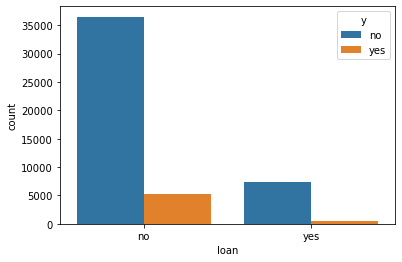

In [38]:
sns.countplot('loan',hue='y',data=Banking)

Most of the population falls under the category who does not have loan and the number of depositor is alo higher in this category only

C:\Users\Neha Mehlawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='contact', ylabel='count'>

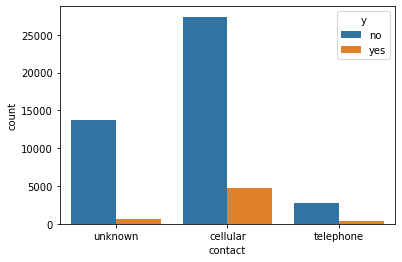

In [39]:
sns.countplot('contact',hue='y',data=Banking)

Ratio of depositer to non depositor is better in case of the one who are using cellular for contact

C:\Users\Neha Mehlawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='count'>

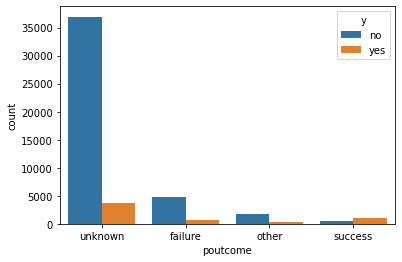

In [40]:
sns.countplot('poutcome',hue='y',data=Banking)

In the category of Success, we can see that the number of depositor is more than the number of non depositor , though the major population falls under the category of unknown

C:\Users\Neha Mehlawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

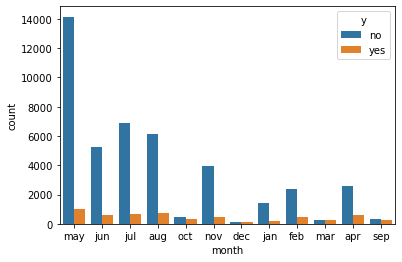

In [41]:
sns.countplot('month',hue='y',data=Banking)

From the above graph we can infer that the survey is conducted to the major population in month of may and lesser in month of december, but if we consider the ratio then in moth of march and december it seems to be equal in terms of deposit and non deposit

### Relationship between Categorical and Numerical Variable

<AxesSubplot:xlabel='y', ylabel='balance'>

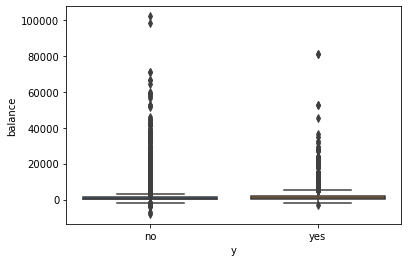

In [42]:
sns.boxplot(x='y',y='balance',data=Banking)

No insights can be seen

<AxesSubplot:xlabel='y', ylabel='campaign'>

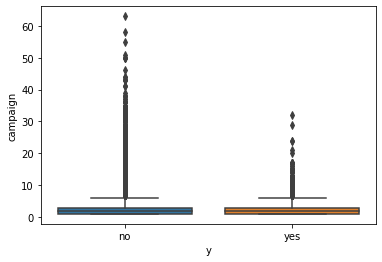

In [43]:
sns.boxplot(x='y',y='campaign',data=Banking)

No insights can be seen

<AxesSubplot:xlabel='y', ylabel='previous'>

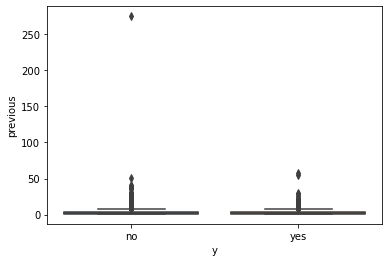

In [44]:
sns.boxplot(x='y',y='previous',data=Banking)

No insights can be seen


### Relationship between Numerical-Numerical Data

<AxesSubplot:xlabel='campaign', ylabel='previous'>

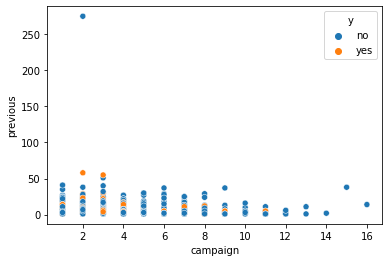

In [45]:
sns.scatterplot(x='campaign',y='previous',hue='y',data=Banking)

No insights can be seen

<AxesSubplot:xlabel='campaign', ylabel='balance'>

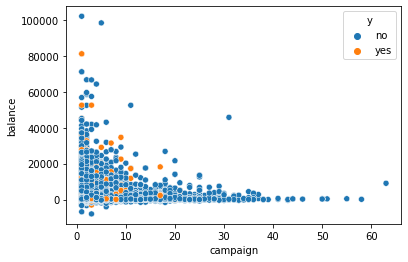

In [46]:
sns.scatterplot(x='campaign',y='balance',hue='y',data=Banking)

In the above graph we can see that the balance is getting decreased as the campaign number is increasing so we can say that these two varibales are inversely proportional to each other

<AxesSubplot:xlabel='previous', ylabel='balance'>

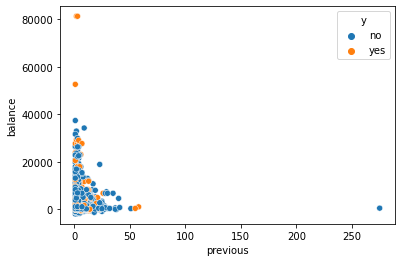

In [47]:
sns.scatterplot(x='previous',y='balance',hue='y',data=Banking)

In this graph again like the above one maximum balance  is concentrated for smaller value of previous(i.e the clients that are contacted least recently)

## correlation

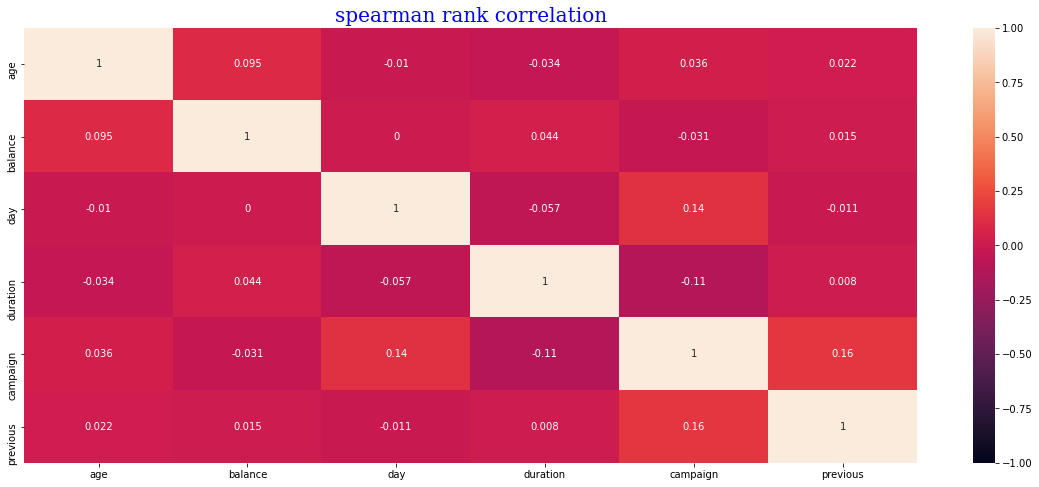

In [55]:
# spearman-rank correlation heatmap

Banking.corr(method='spearman')                    #selecting method as spearman
plt.figure(figsize=(20,8))                       # fixing figure size
heatmap= sns.heatmap(Banking.corr(method='spearman').round(3),vmin=-1,
                     vmax=1,annot=True)          #plotting heatmap,"annot=true" means writting value in each cell

font1={'family':'serif','color':'blue','size':20} #fixing font size of heat map
plt.title('spearman rank correlation',font1)      # fixing title to the heatmap
plt.show()                                        # display heatmap

As from the above correlation graph we can see that there is no strong correlation between any numerical varibales 

## Conclusion

Economic conditions have a big impact on commercial institutions and banking sectors. Accordingly, marketing managers need to improve their marketing campaigns and deliver them to more people. The most difficult problems arise due to large amounts of data recording.

As if we consider marital status and the education as the economic condition then we can see that the people who are single are comparitively are more who are in ratio as depositor and similarly in case of education who are falling under secondary education are more in depositor ratio.